# Breast Cancer Wisconsin (Diagnostic) Data Set

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from sklearn.decomposition import KernelPCA

## Load data

In [101]:
headers = ["ID", "Diagnosis",
           "radius_ME", "texture_ME", "perimeter_ME", "area_ME", "smoothness_ME", "compactness_ME", "concavity_ME", "concave_points_ME", "symmetry_ME", "fractal_dimension_ME",
           "radius_SE", "texture_SE", "perimeter_SE", "area_SE", "smoothness_SE", "compactness_SE", "concavity_SE", "concave_points_SE", "symmetry_SE", "fractal_dimension_SE",
           "radius_WS", "texture_WS", "perimeter_WS", "area_WS", "smoothness_WS", "compactness_WS", "concavity_WS", "concave_points_WS", "symmetry_WS", "fractal_dimension_WS"]

df = pd.read_csv('Data/wdbc.data', names=headers)
pd.set_option('max_columns',len(df.columns))
df

,ID,Diagnosis,radius_ME,texture_ME,perimeter_ME,area_ME,smoothness_ME,compactness_ME,concavity_ME,concave_points_ME,symmetry_ME,fractal_dimension_ME,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_WS,texture_WS,perimeter_WS,area_WS,smoothness_WS,compactness_WS,concavity_WS,concave_points_WS,symmetry_WS,fractal_dimension_WS
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


## Data preprocessing

In [102]:
df = pd.get_dummies(df[df.columns])

In [103]:
df.head()

,ID,radius_ME,texture_ME,perimeter_ME,area_ME,smoothness_ME,compactness_ME,concavity_ME,concave_points_ME,symmetry_ME,fractal_dimension_ME,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,...,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_WS,texture_WS,perimeter_WS,area_WS,smoothness_WS,compactness_WS,concavity_WS,concave_points_WS,symmetry_WS,fractal_dimension_WS,Diagnosis_B,Diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


## Data Visualization

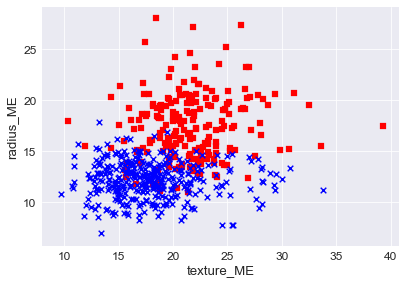

In [104]:
colors = ['r', 'b']
markers = ['s', 'x']


for l, c, m in zip(np.unique(df["Diagnosis_B"]), colors, markers): 
    plt.scatter(df["texture_ME"][df["Diagnosis_B"]==l],
                df["radius_ME"][df["Diagnosis_B"]==l],
                c=c, label=l, marker=m)
plt.xlabel('texture_ME')
plt.ylabel('radius_ME')
plt.show()

In [105]:
for k, v in enumerate(df.columns):
    print(k, v)

0 ID
1 radius_ME
2 texture_ME
3 perimeter_ME
4 area_ME
5 smoothness_ME
6 compactness_ME
7 concavity_ME
8 concave_points_ME
9 symmetry_ME
10 fractal_dimension_ME
11 radius_SE
12 texture_SE
13 perimeter_SE
14 area_SE
15 smoothness_SE
16 compactness_SE
17 concavity_SE
18 concave_points_SE
19 symmetry_SE
20 fractal_dimension_SE
21 radius_WS
22 texture_WS
23 perimeter_WS
24 area_WS
25 smoothness_WS
26 compactness_WS
27 concavity_WS
28 concave_points_WS
29 symmetry_WS
30 fractal_dimension_WS
31 Diagnosis_B
32 Diagnosis_M


In [106]:
sns.set(style='darkgrid', context='paper', font_scale=1.5, palette="RdBu")

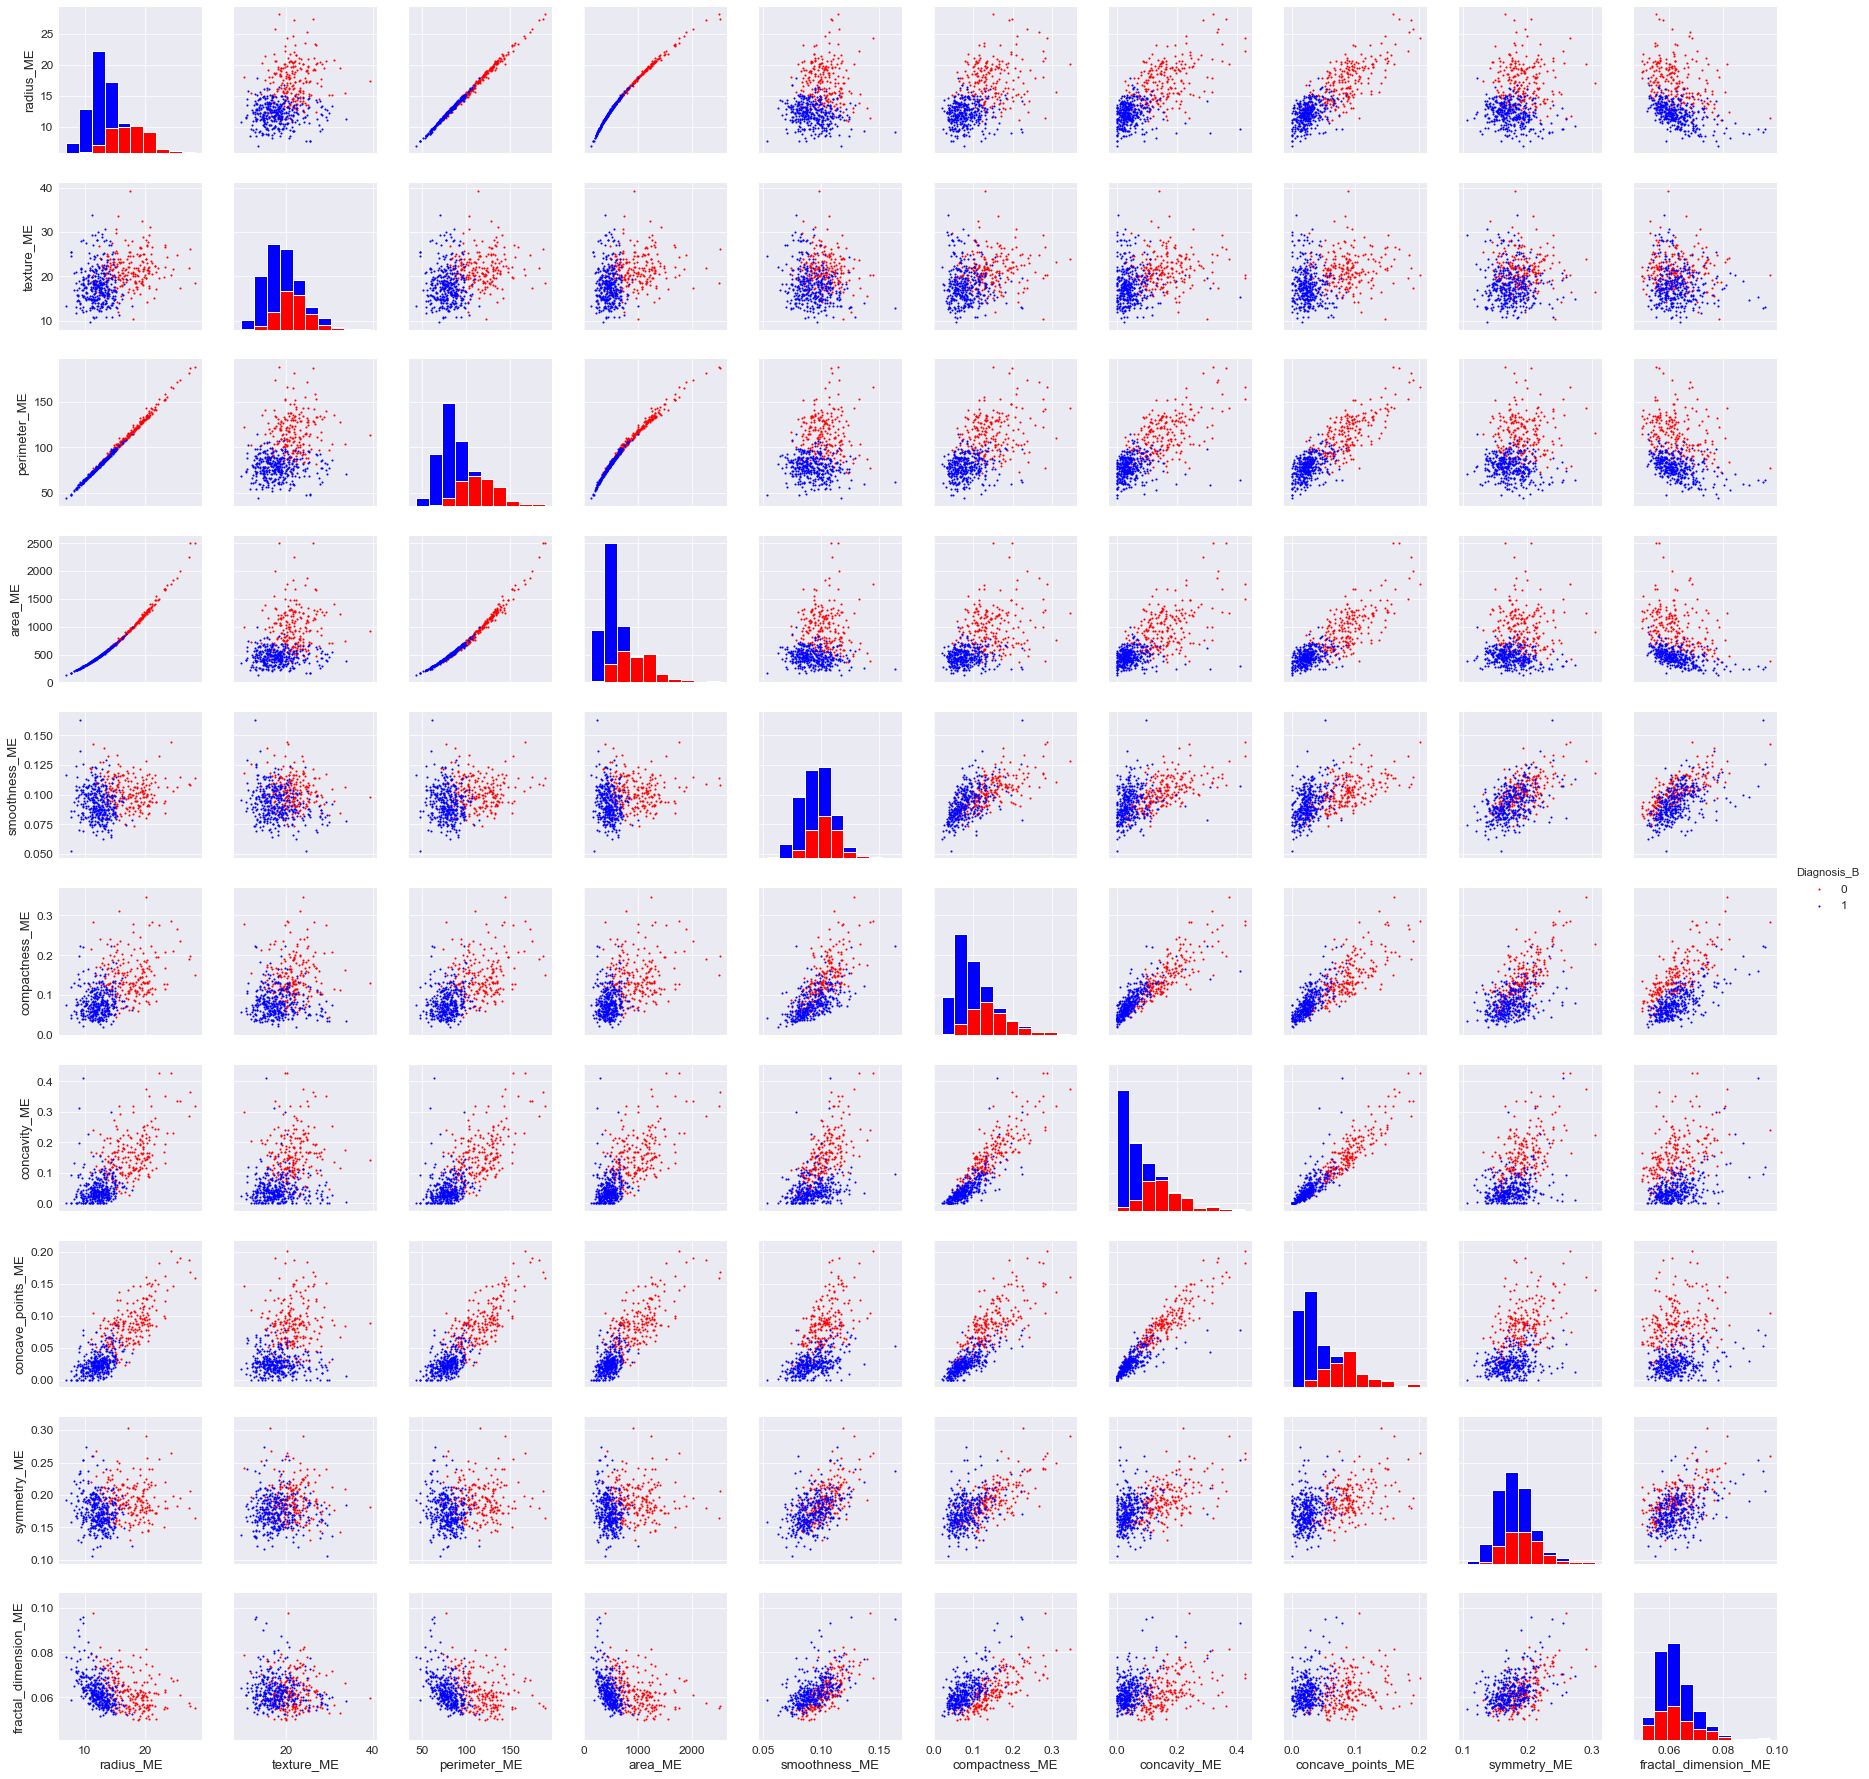

In [107]:
g=sns.PairGrid(df, vars=df.columns[1:11], hue="Diagnosis_B", palette={0:'r', 1:'b'})
g = g.map_diag(plt.hist, edgecolor='w', linewidth='1')
g = g.map_offdiag(plt.scatter, s=3)
g = g.add_legend()
plt.show()

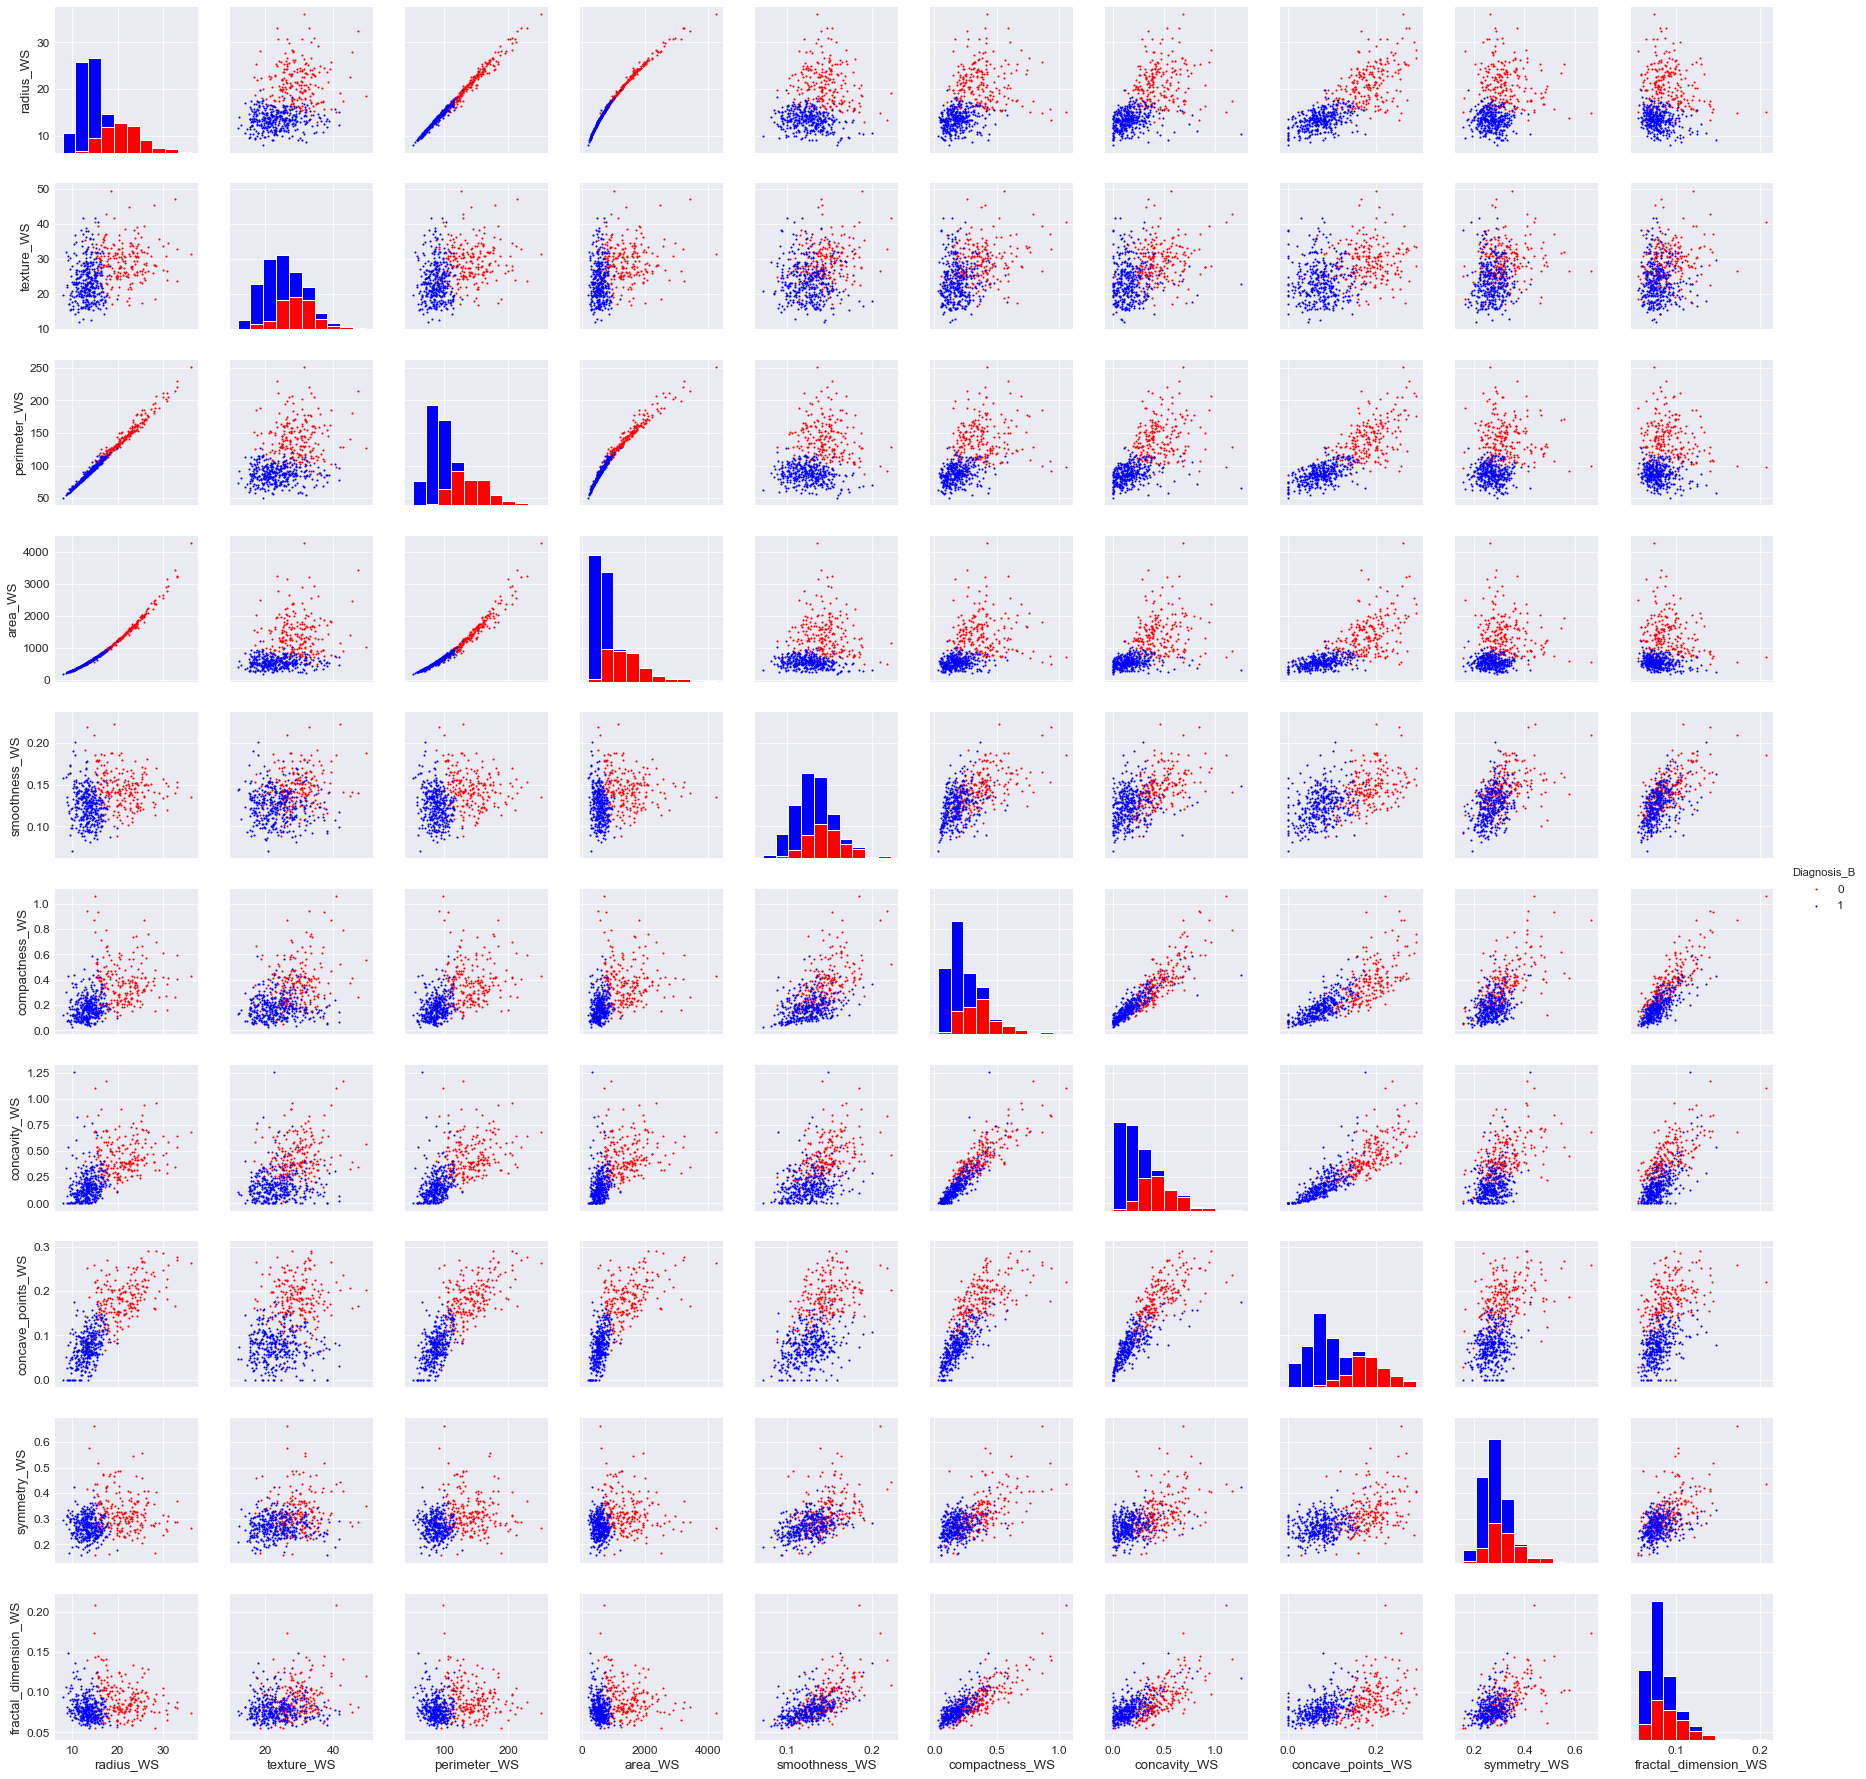

In [108]:
g=sns.PairGrid(df, vars=df.columns[21:31], hue="Diagnosis_B", palette={0:'r', 1:'b'})
g = g.map_diag(plt.hist, edgecolor='w', linewidth='1')
g = g.map_offdiag(plt.scatter, s=3)
g = g.add_legend()
plt.show()

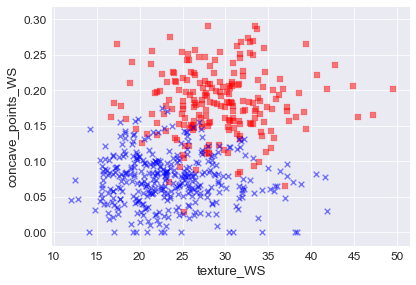

In [109]:
colors = ['r', 'b']
markers = ['s', 'x']

X = pd.concat([df["texture_WS"], df["concave_points_WS"]], axis=1)
y = df["Diagnosis_B"]

for l, c, m in zip(np.unique(y), colors, markers): 
    plt.scatter(X['texture_WS'][y==l],
                X['concave_points_WS'][y==l],
                c=c, label=l, marker=m, alpha=0.5)
plt.xlabel('texture_WS')
plt.ylabel('concave_points_WS')
plt.show()

## Try to seperate with Kernal PCA

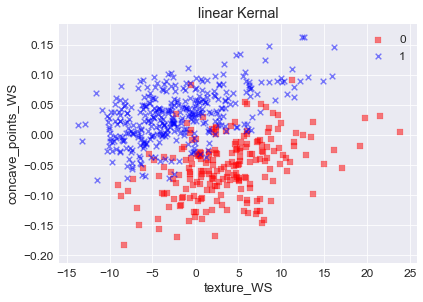

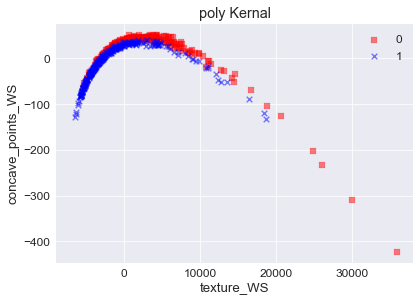

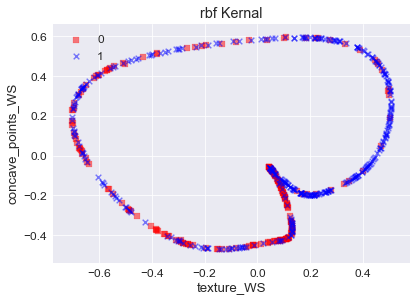

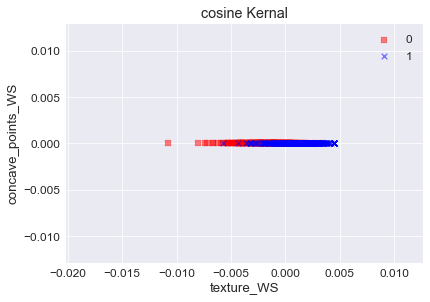

In [110]:
kernels=['linear', 'poly', 'rbf', 'cosine']

for k in kernels:
    for l, c, m in zip(np.unique(y), colors, markers):
        kpca = KernelPCA(n_components=None, kernel=k)
        X_kpca = kpca.fit_transform(X)
        ll=plt.scatter(X_kpca[y==l,0], X_kpca[y==l,1], c=c, marker=m, alpha=0.5, label=l)
        plt.legend()
        plt.xlabel('texture_WS')
        plt.ylabel('concave_points_WS')
    plt.title('%s Kernal'% k)
    plt.show()

Failed to separate linearly even with the **Kernel** trick.

## Classification with Perceptron (2D)

### Train test split

In [111]:
X = pd.concat([df["texture_WS"], df["concave_points_WS"]], axis=1)
y = df["Diagnosis_B"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Feature scaling (standardization)

In [112]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Setting up and fitting the Perceptron model

In [113]:
ppn = Perceptron(n_iter=40, eta0=0.1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

### Train accuracy

In [114]:
y_pred = ppn.predict(X_train_std)
print('Misclassified samples: %d' % (y_train != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_train, y_pred))

Misclassified samples: 45
Accuracy: 0.89


### Test accuracy

In [115]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 15
Accuracy: 0.91


In [116]:
y_self=[]
for k in np.arange(len(X_test_std)):
    dot_result = np.dot(ppn.coef_, X_test_std[k])
    dot_result = 1 if dot_result > -0.2 else 0
    y_self.append(dot_result)

y_self - y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [117]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set', edgecolors='0')

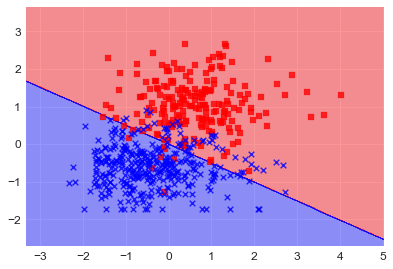

In [118]:
X_combined_std = np.vstack((X_test_std, X_train_std))
y_combined_std = np.hstack((y_test, y_train))

plot_decision_regions(X_combined_std, y_combined_std, classifier=ppn)
plt.show()

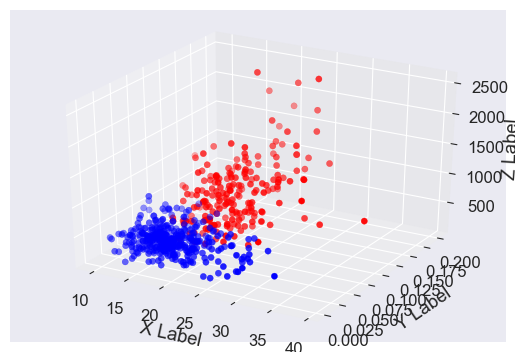

In [119]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

for l, c in zip(np.unique(df["Diagnosis_B"]), ['r','b']):
    ax.scatter(df["texture_ME"][df["Diagnosis_B"]==l], df["concave_points_ME"][df["Diagnosis_B"]==l], df["area_ME"][df["Diagnosis_B"]==l], c=c)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Assessing feature importance with random forests

In [120]:
from sklearn.ensemble import RandomForestClassifier

data = [df["radius_ME"], df["texture_ME"], df["smoothness_ME"], df["compactness_ME"],
        df["concavity_ME"], df["concave_points_ME"], df["symmetry_ME"], df["fractal_dimension_ME"]]

X = pd.concat(data, axis=1)
y = df["Diagnosis_B"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

feat_labels = X.columns[0:8]
forest = RandomForestClassifier(n_estimators=10000,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, 
          feat_labels[indices[f]],
          importances[indices[f]]))

 1) concave_points_ME              0.278060
 2) radius_ME                      0.223673
 3) concavity_ME                   0.207096
 4) compactness_ME                 0.090900
 5) texture_ME                     0.087501
 6) smoothness_ME                  0.044140
 7) fractal_dimension_ME           0.037606
 8) symmetry_ME                    0.031023


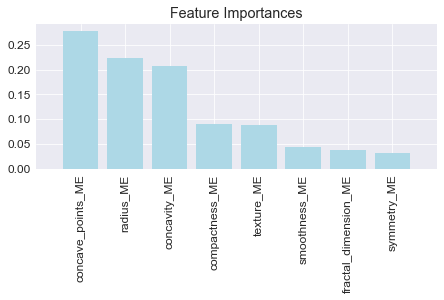

In [121]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],
          rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Classification with Perceptron (Multi dimension)

In [122]:
data = []

#cols = df.columns.get_values()
#cols = cols.tolist()
#cols = cols[1:11]
#data.append(df[cols])

data = [df["radius_ME"], df["texture_ME"], df["smoothness_ME"], df["compactness_ME"],
        df["concavity_ME"], df["concave_points_ME"], df["symmetry_ME"], df["fractal_dimension_ME"]]

X = pd.concat(data, axis=1)
y = df["Diagnosis_B"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Feature scaling (standardization)

In [123]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Setting up and fitting the Perceptron model

In [124]:
ppn = Perceptron(n_iter=40, eta0=0.1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

### Train accuracy

In [125]:
y_pred = ppn.predict(X_train_std)
print('Training misclassified samples: %d' % (y_train != y_pred).sum())
print('Training accuracy: %.2f' % accuracy_score(y_train, y_pred))

Training misclassified samples: 29
Training accuracy: 0.93


### Test accuracy

In [126]:
y_pred = ppn.predict(X_test_std)
print('Test misclassified samples: %d' % (y_test != y_pred).sum())
print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

Test misclassified samples: 12
Test accuracy: 0.93


## Classification with Logistic Regression (multi dimensional)

In [127]:
from sklearn.linear_model import LogisticRegression

# Extract the columns and merge them into a single dataframe X
data = [df["radius_ME"], df["texture_ME"], df["smoothness_ME"], df["compactness_ME"],
        df["concavity_ME"], df["concave_points_ME"], df["symmetry_ME"], df["fractal_dimension_ME"]]

X = pd.concat(data, axis=1)
y = df["Diagnosis_B"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize X and y
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1000.0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_train_std)
print('Training misclassified samples: %d' % (y_train != y_pred).sum())
print('Training accuracy: %.2f' % accuracy_score(y_train, y_pred))

y_pred = lr.predict(X_test_std)
print('Test misclassified samples: %d' % (y_test != y_pred).sum())
print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

Training misclassified samples: 26
Training accuracy: 0.93
Test misclassified samples: 11
Test accuracy: 0.94


## Classification with other sklearn classifiers

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Extract the columns and merge them into a single dataframe X
data = [df["radius_ME"], df["texture_ME"]]

X = pd.concat(data, axis=1)
y = df["Diagnosis_B"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize X and y
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_test_std, X_train_std))
y_combined_std = np.hstack((y_test, y_train))
    
for name, clf in zip(names, classifiers):
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_train_std)
    print(name)
    print('Training accuracy: %.2f' % accuracy_score(y_train, y_pred))
    
    y_pred = clf.predict(X_test_std)
    print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

    #plot_decision_regions(X_combined_std, y_combined_std, classifier=clf)
plt.show()

Nearest Neighbors
Training accuracy: 0.92
Test accuracy: 0.92
Linear SVM
Training accuracy: 0.87
Test accuracy: 0.92
RBF SVM
Training accuracy: 0.90
Test accuracy: 0.92
Gaussian Process
Training accuracy: 0.89
Test accuracy: 0.93
Decision Tree
Training accuracy: 0.94
Test accuracy: 0.87
Random Forest
Training accuracy: 0.93
Test accuracy: 0.90
Neural Net
Training accuracy: 0.90
Test accuracy: 0.92
AdaBoost
Training accuracy: 0.92
Test accuracy: 0.90
Naive Bayes
Training accuracy: 0.87
Test accuracy: 0.90
QDA
Training accuracy: 0.88
Test accuracy: 0.91


## Model evaluation with Stratified K-fold

In [158]:
lr = LogisticRegression(C=1000.0)
kfold = StratifiedKFold(y=y_train,
                        n_folds=10)
scores=[]
for k, (train, test) in enumerate(kfold):
    lr.fit(X_train[train], y_train[train])
    score = lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, class dist.: , Acc: %.3f' % (k+1, score))
print('Mean score: %.2f, STD: %.2f' % (np.mean(scores), np.std(scores)))

Fold: 1, class dist.: , Acc: 0.976
Fold: 2, class dist.: , Acc: 0.927
Fold: 3, class dist.: , Acc: 0.951
Fold: 4, class dist.: , Acc: 0.925
Fold: 5, class dist.: , Acc: 0.950
Fold: 6, class dist.: , Acc: 0.949
Fold: 7, class dist.: , Acc: 0.923
Fold: 8, class dist.: , Acc: 0.923
Fold: 9, class dist.: , Acc: 0.872
Fold: 10, class dist.: , Acc: 0.923
Mean score: 0.93, STD: 0.03


## Evaluating multiple classification models from sklearn with Stratified K-fold

In [169]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cross_validation import StratifiedKFold

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Extract the columns and merge them into a single dataframe X
data = [df["radius_ME"], df["texture_ME"], df["smoothness_ME"], df["compactness_ME"],
        df["concavity_ME"], df["concave_points_ME"], df["symmetry_ME"], df["fractal_dimension_ME"]]

X = pd.concat(data, axis=1)
y = df["Diagnosis_B"]

# Convert pandas dataframe to numpy.ndarray
X = X.as_matrix()
y = y.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize X and y
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_test_std, X_train_std))
y_combined_std = np.hstack((y_test, y_train))

scores_mean = []
scores_std = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train_std, y_train)
    
    scores = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X_train[train], y_train[train])
        score = clf.score(X_train[test], y_train[test])
        scores.append(score)
        #print('Fold: %s, class dist.: , Acc: %.3f' % (k+1, score))
    print('Mean score: %.2f, STD: %.2f %s' % (np.mean(scores), np.std(scores), name))
    scores_mean.append(np.mean(scores))
    scores_std.append(np.std(scores))

Mean score: 0.88, STD: 0.04 Nearest Neighbors
Mean score: 0.91, STD: 0.03 Linear SVM
Mean score: 0.87, STD: 0.06 RBF SVM
Mean score: 0.94, STD: 0.03 Gaussian Process
Mean score: 0.92, STD: 0.03 Decision Tree
Mean score: 0.93, STD: 0.02 Random Forest


C:\Users\charlie_chiu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Mean score: 0.63, STD: 0.20 Neural Net
Mean score: 0.96, STD: 0.02 AdaBoost
Mean score: 0.92, STD: 0.02 Naive Bayes
Mean score: 0.95, STD: 0.02 QDA


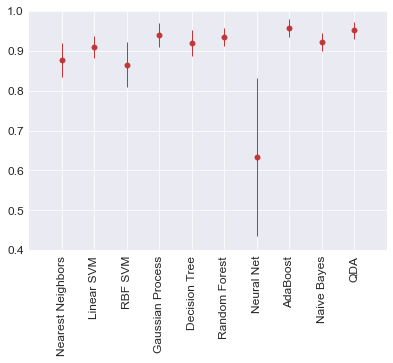

In [229]:
plt.figure()
plt.errorbar(range(len(scores_mean)), scores_mean, yerr=scores_std, linewidth=0, elinewidth=1)
plt.xticks(range(len(scores_mean)),
           names,
           rotation=90)
plt.scatter(range(len(scores_mean)), scores_mean)
plt.axis([-1, len(scores_mean), 0.4, 1.0])
plt.show()

## Model parameter fine tuning with Validation curve

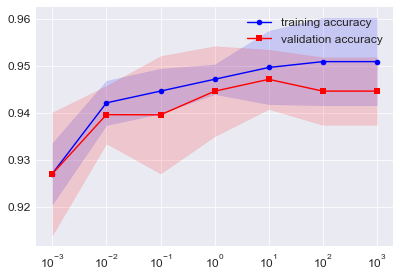

In [247]:
from sklearn.learning_curve import validation_curve
svc = SVC(kernel="linear", C=0.025)
#lr = LogisticRegression()
para = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(estimator=lr,
                                             X=X_train_std,
                                             y=y_train,
                                             param_name='C',
                                             param_range=para)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(para, train_mean, color='blue', marker='o', label='training accuracy')
plt.fill_between(para, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(para, test_mean, color='red', marker='s', label='validation accuracy')
plt.fill_between(para, test_mean+test_std, test_mean-test_std, alpha=0.15, color='red')
plt.xscale('log')
plt.legend()
plt.show()